In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [2]:
 df = pd.read_csv('NZ.csv')

In [4]:
#Display the first few rows to check
print(df.head())

  Patient_ID  Age  Gender Ethnicity    Region Cancer_Type      Stage  \
0    NZP0001   71    Male     Other   Dunedin  Colorectal    Stage I   
1    NZP0002   83    Male    Pākehā  Hamilton  Colorectal  Stage III   
2    NZP0003   24   Other     Other   Dunedin  Colorectal   Stage II   
3    NZP0004   73  Female     Asian   Dunedin      Breast    Stage I   
4    NZP0005   82  Female     Māori  Auckland      Breast   Stage IV   

  Diagnosis_Date Treatment_Type  Survival_Years    Status  
0     2014-03-19    Combination             9.4     Alive  
1     2020-06-11    Combination             3.6  Deceased  
2     2019-07-05      Radiation             5.9     Alive  
3     2019-07-21    Combination            14.1     Alive  
4     2017-12-01      Radiation             6.2  Deceased  


In [5]:
#Display basic info about the loaded data
print("\nData Information:")
df.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      500 non-null    object 
 1   Age             500 non-null    int64  
 2   Gender          500 non-null    object 
 3   Ethnicity       500 non-null    object 
 4   Region          500 non-null    object 
 5   Cancer_Type     500 non-null    object 
 6   Stage           500 non-null    object 
 7   Diagnosis_Date  500 non-null    object 
 8   Treatment_Type  500 non-null    object 
 9   Survival_Years  500 non-null    float64
 10  Status          500 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 43.1+ KB


In [6]:
#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Patient_ID        0
Age               0
Gender            0
Ethnicity         0
Region            0
Cancer_Type       0
Stage             0
Diagnosis_Date    0
Treatment_Type    0
Survival_Years    0
Status            0
dtype: int64


In [8]:
#Data preprocessing
#Convert Diagnosis_Date to datetime
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'])
df['Diagnosis_Year'] = df['Diagnosis_Date'].dt.year

In [9]:
# Basic statistics of numerical columns
print("\nBasic Statistics:")
display(df.describe())


Basic Statistics:


,Age,Survival_Years,Diagnosis_Year
count,500.000000,500.000000,500.000000
mean,54.674000,7.364800,2017.044000
std,20.371591,4.451741,4.281908
min,20.000000,0.100000,2010.000000
25%,37.000000,3.400000,2013.000000
50%,55.000000,7.250000,2017.000000
75%,73.000000,11.025000,2021.000000
max,90.000000,15.000000,2024.000000


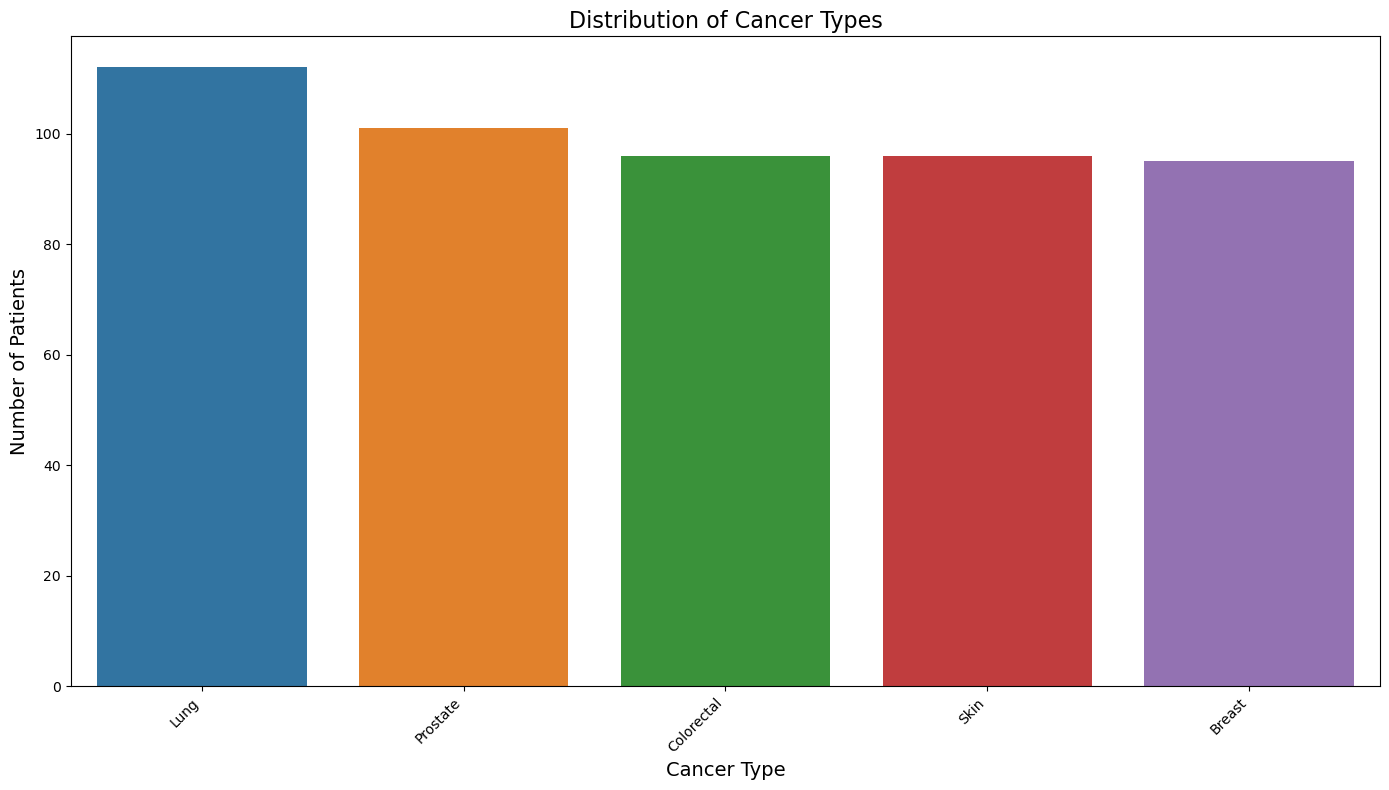

In [10]:
#Visualization: Cancer Type Distribution
plt.figure(figsize=(14, 8))
cancer_counts = df['Cancer_Type'].value_counts()
sns.barplot(x=cancer_counts.index, y=cancer_counts.values)
plt.title('Distribution of Cancer Types', fontsize=16)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

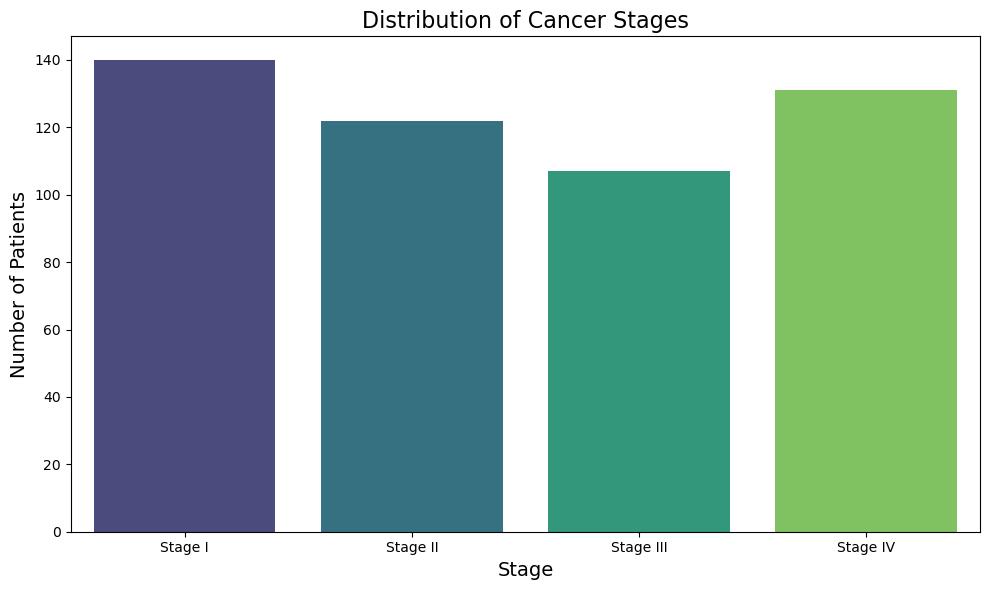

In [13]:
#Visualization: Cancer Stage Distribution
plt.figure(figsize=(10, 6))
stage_counts = df['Stage'].value_counts().sort_index()
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='viridis')
plt.title('Distribution of Cancer Stages', fontsize=16)
plt.xlabel('Stage', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of Patients')

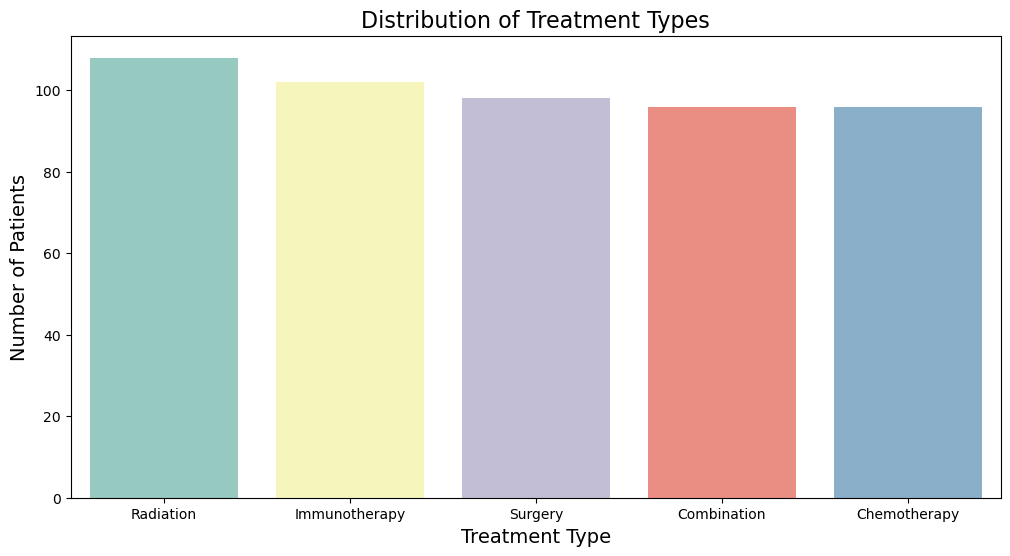

In [16]:
#Treatment Distribution
plt.figure(figsize=(12, 6))
treatment_counts = df['Treatment_Type'].value_counts()
ax = sns.barplot(x=treatment_counts.index, y=treatment_counts.values, palette='Set3')
plt.title('Distribution of Treatment Types', fontsize=16)
plt.xlabel('Treatment Type', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)

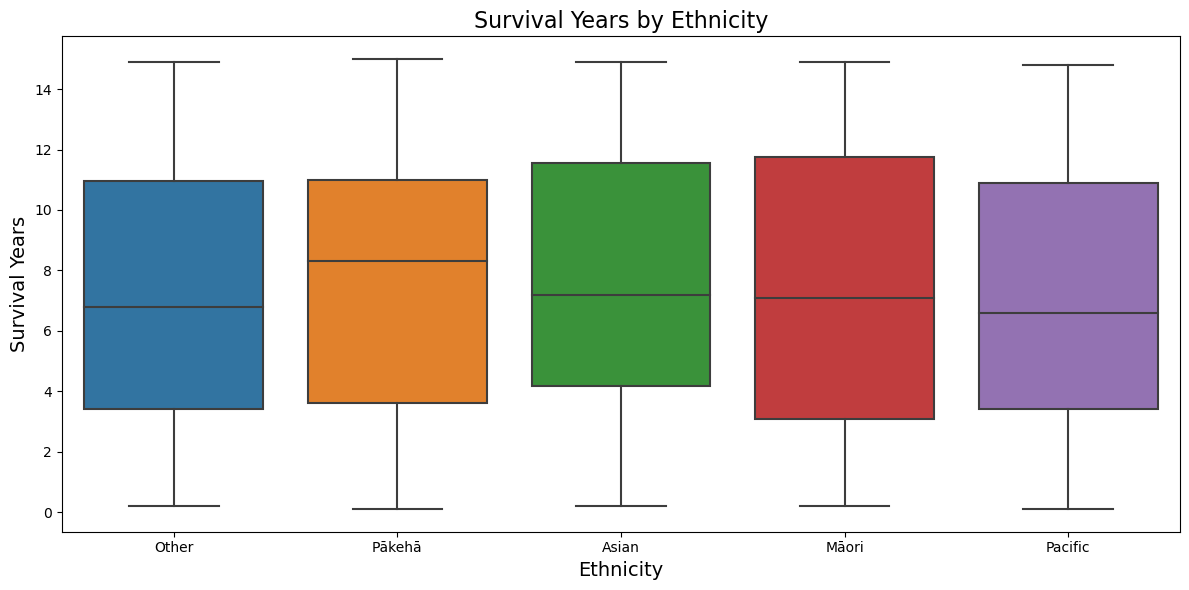

In [17]:
#Survival analysis by ethnicity
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ethnicity', y='Survival_Years', data=df)
plt.title('Survival Years by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Survival Years', fontsize=14)
plt.tight_layout()
plt.show()

In [21]:
# Summary of key findings
print("\nKey Findings:")
print(f"- Most common cancer type: {df['Cancer_Type'].value_counts().index[0]}")
print(f"- Most common treatment: {df['Treatment_Type'].value_counts().index[0]}")
print(f"- Average survival years: {df['Survival_Years'].mean():.2f}")
print(f"- Survival rate: {100 * (df['Status'] == 'Alive').mean():.2f}%")


Key Findings:
- Most common cancer type: Lung
- Most common treatment: Radiation
- Average survival years: 7.36
- Survival rate: 48.60%


In [24]:
#Treatment with highest average survival years
best_treatment = df.groupby('Treatment_Type')['Survival_Years'].mean().sort_values(ascending=False).index[0]
print(f"- Treatment with highest average survival years: {best_treatment}")

- Treatment with highest average survival years: Radiation


In [25]:
#Gender with higher survival rate
gender_survival = df.groupby('Gender').apply(lambda x: 100 * (x['Status'] == 'Alive').mean())
print(f"- Gender with higher survival rate: {gender_survival.idxmax()} ({gender_survival.max():.2f}%)")

- Gender with higher survival rate: Female (49.71%)


In [26]:
#Region with highest cancer prevalence
region_cases = df['Region'].value_counts()
print(f"- Region with highest cancer cases: {region_cases.index[0]} ({region_cases.iloc[0]} cases)")

- Region with highest cancer cases: Auckland (123 cases)


In [34]:
#Median Age at Diagnosis by Gender
if {'Age', 'Gender'}.issubset(df.columns):
    median_age_by_gender = df.groupby('Gender')['Age'].median()
    print(f"- Median Age at Diagnosis by Gender:")
    print(median_age_by_gender)

- Median Age at Diagnosis by Gender:
Gender
Female    55.0
Male      58.5
Other     51.0
Name: Age, dtype: float64


In [44]:
# Most Common Treatment for the Most Frequent Cancer Type
if {'Cancer_Type', 'Treatment_Type'}.issubset(df.columns):
    if not df['Cancer_Type'].isnull().all():
        most_frequent_cancer = df['Cancer_Type'].mode()[0]
        print(f"\nMost Frequent Cancer Type: {most_frequent_cancer}")

        # Find the most common treatment for this specific cancer type
        df_top_cancer = df[df['Cancer_Type'] == most_frequent_cancer]
        if not df_top_cancer.empty and not df_top_cancer['Treatment_Type'].isnull().all():
             most_common_treatment_for_top_cancer = df_top_cancer['Treatment_Type'].mode()[0]
             print(f"   - Most Common Treatment for {most_frequent_cancer}: {most_common_treatment_for_top_cancer}")
        else:
             print(f"   - Could not determine most common treatment for {most_frequent_cancer} (no data or treatment info missing).")
    else:
         print("\n. Cannot determine most frequent cancer: 'Cancer_Type' column is empty or all NaN.")
else:
    print("\n3. Cannot calculate treatment for top cancer: Missing 'Cancer_Type' or 'Treatment_Type' column.")


Most Frequent Cancer Type: Lung
   - Most Common Treatment for Lung: Radiation


In [53]:
#Cancer Type with Highest Median Survival Years
try:
   
    if pd.api.types.is_numeric_dtype(df['Survival_Years']) and 'Cancer_Type' in df.columns:
        median_survival_by_type = df.groupby('Cancer_Type')['Survival_Years'].median()

        if not median_survival_by_type.empty and median_survival_by_type.notna().any():
            type_max_survival = median_survival_by_type.idxmax()
            max_survival_years = median_survival_by_type.max()
            print(f"\nCancer type with highest median survival: {type_max_survival}")
            print(f"   - Median Survival Years: {max_survival_years:.2f}")
        else:
            print("\n Could not determine cancer type with highest median survival (check data).")
    else:
        print("\n Skipping survival/cancer type analysis: 'Survival_Years' not numeric or 'Cancer_Type' column missing.")
except Exception as e:
    print(f"\n Error during survival/cancer type analysis: {e}")


Cancer type with highest median survival: Colorectal
   - Median Survival Years: 8.15


In [54]:
# Most Common Treatment for Patients Surviving > 5 Years vs. <= 5 Years
try:
    # Ensure Survival_Years is numeric and Treatment_Type exists
    if pd.api.types.is_numeric_dtype(df['Survival_Years']) and 'Treatment_Type' in df.columns:
        # Group 1: Survived > 5 years
        long_term_survivors = df[df['Survival_Years'] > 5]
        # Group 2: Survived <= 5 years (or event occurred before/at 5 years)
        shorter_term = df[df['Survival_Years'] <= 5]

        if not long_term_survivors.empty and not long_term_survivors['Treatment_Type'].mode().empty:
            treatment_long_term = long_term_survivors['Treatment_Type'].mode()[0]
            print(f"\n Most common treatment for those surviving > 5 years: {treatment_long_term}")
        else:
             print("\n Could not determine common treatment for > 5 year survivors (insufficient data or missing treatments).")

        if not shorter_term.empty and not shorter_term['Treatment_Type'].mode().empty:
            treatment_shorter_term = shorter_term['Treatment_Type'].mode()[0]
            print(f"   - Most common treatment for those surviving <= 5 years: {treatment_shorter_term}")
        else:
             print("   - Could not determine common treatment for <= 5 year survivors (insufficient data or missing treatments).")
    else:
        print("\n Skipping treatment/survival analysis: 'Survival_Years' not numeric or 'Treatment_Type' column missing.")
except Exception as e:
    print(f"\n Error during treatment/survival analysis: {e}")


 Most common treatment for those surviving > 5 years: Radiation
   - Most common treatment for those surviving <= 5 years: Combination


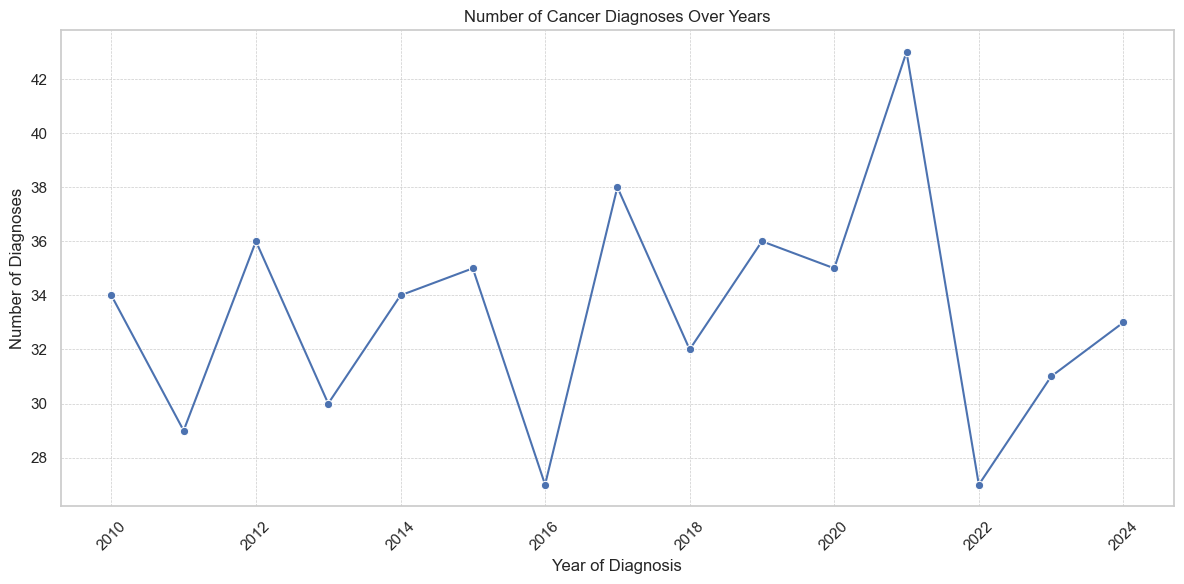

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

if 'df' in locals() and isinstance(df, pd.DataFrame) and not df.empty:
    if 'Diagnosis_Date' in df.columns:
        try:
            df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'], errors='coerce')
            valid_dates_df = df.dropna(subset=['Diagnosis_Date']).copy()

            if not valid_dates_df.empty:
                valid_dates_df['Diagnosis_Year'] = valid_dates_df['Diagnosis_Date'].dt.year
                diagnosis_counts_per_year = valid_dates_df['Diagnosis_Year'].value_counts().sort_index()
                if not diagnosis_counts_per_year.empty:
                    plt.figure() # Create a new figure
                    sns.lineplot(x=diagnosis_counts_per_year.index, y=diagnosis_counts_per_year.values, marker='o')
                    plt.title('Number of Cancer Diagnoses Over Years')
                    plt.xlabel('Year of Diagnosis')
                    plt.ylabel('Number of Diagnoses')
                    plt.xticks(rotation=45)
                    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
                    plt.tight_layout()
                    plt.show()
                else:
                    print("No valid diagnosis counts found after processing dates.")

            else:
                print("No valid dates found in 'Diagnosis_Date' column after conversion.")

        except KeyError:
             print("Error: 'Diagnosis_Date' column not found (this check should not be reached but added for safety).")
        except Exception as e:
            print(f"An error occurred during data preparation or plotting: {e}")

    else:
        print("Error: 'Diagnosis_Date' column not found in the DataFrame.")
else:
    print("Error: DataFrame 'df' not found or is empty.")



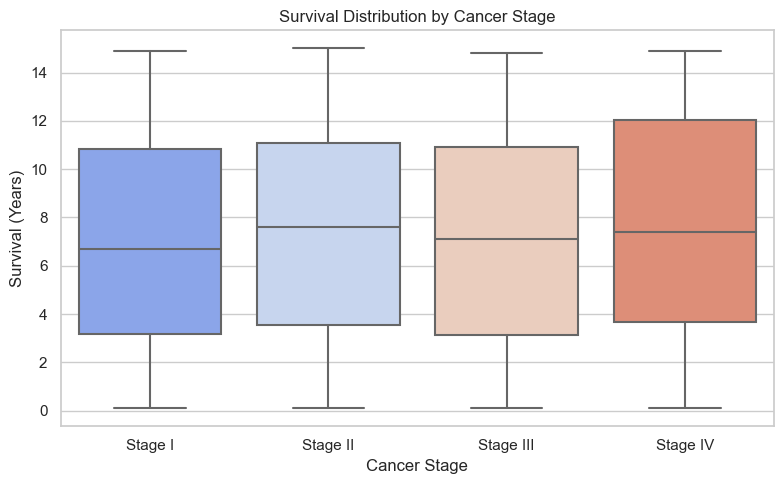

In [68]:
plt.figure(figsize=(8, 5))
try:
    stage_order = sorted(df['Stage'].unique(), key=lambda x: str(x))
    sns.boxplot(data=df, x='Stage', y='Survival_Years', order=stage_order, palette="coolwarm")
    plt.title('Survival Distribution by Cancer Stage')
    plt.xlabel('Cancer Stage')
    plt.ylabel('Survival (Years)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not plot Survival by Stage: {e}")

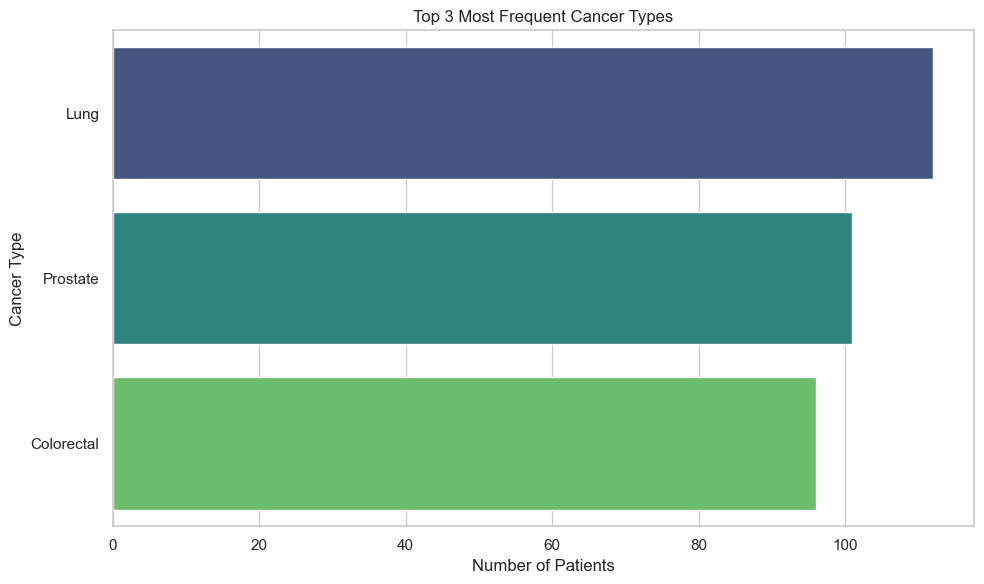

In [72]:
plt.figure(figsize=(10, 6))
try:
    n_top_cancers = 3
    sns.countplot(data=df, y='Cancer_Type',
                  order=df['Cancer_Type'].value_counts().iloc[:n_top_cancers].index,
                  palette="viridis")
    plt.title(f'Top {n_top_cancers} Most Frequent Cancer Types')
    plt.xlabel('Number of Patients')
    plt.ylabel('Cancer Type')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not plot Cancer Type Frequencies: {e}")